<a href="https://colab.research.google.com/github/souzajvp/teaching-python/blob/main/Aula03/Aula03_Trabalhando_com_dados_de_verdade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisão da última aula

* Avalie qual a média e o desvio padrão das idades dos seguintes pacientes. Em seguida tente tirar conclusões dos valores encontrados.



In [1]:
import numpy as np

In [2]:
idades = [50,55,63,34,75,55,66,49,51,35,66]

54.45454545454545

12.138321258526922

Considerando as idades acima, notamos que os pacientes tem 54 anos de idade, em média. Além disso, também notamos que o desvio é pequeno comparado a média, o que pode indicar que temos uma **concentração de pacientes com idades próximas!**

* Avalie qual a média e o desvio padrão dos pesos dos seguintes pacientes. Em seguida tente tirar conclusões dos valores encontrados.


In [5]:
pesos = [55,20,77,93,54,110,25,99,66,67,33,115]

67.83333333333333

30.805392745787582

Neste caso, notamos que o desvio dos pesos é grande, indicando que temos pacientes com peso reduzido até pesos mais elevados.

Isso poderia indicar que temos um grupo de pacientes com diferentes idades!

* Use a função `print()` para criar frases usando os resultados dos dois exercícios anteriores.

**Obs**: Lembre-se de usar a função round() para arredondar os valores!

A média de idades dos meus pacientes é 54.45 +- 12.14


A média dos pesos dos meus pacientes é de 67.83 +- 30.81


# Trabalhando com um banco de dados real!
Até agora vimos um pouco do básico do python. Apesar de isso ser importante para possibilitar que vocês possam se orientar nesse mundo, eu penso que **só aprendemos colocando a mão na massa**!

Hoje vamos trabalhar com um **banco de dados de pacientes que possuiam problemas cardíacos**.

Link do banco de dados no [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).

## Usando o pacote pandas
***
![img](https://miro.medium.com/max/2625/0*kVETqwtYsQ8BFJDc.gif)


O pandas vai ser o melhor amigo de vocês pra quase qualquer tarefa de análise de dados! Com ele, podemos executar uma grande variedade de comandos que facilitam nossa vida ao trabalhar com dados!

In [10]:
import pandas as pd

Para carregar nossos dados, temos algumas opções:
1. Podemos fazer o upload de um arquivo e em seguida lê-lo;
2. Utilizar um link que contenha a informação do arquivo e lê-lo diretamente.

O pandas é capaz de ler diversos formatos: `excel, csv, txt e até pdf.`

In [11]:
url = 'https://raw.githubusercontent.com/souzajvp/teaching-python/main/Aula03/heart.csv'

Neste caso, nosso arquivo está no formato .csv (*comma separated value*), então vamos usar a função `pd.read_csv()` para realizar a leitura.

Qual é o tipo da nossa variável dados?

pandas.core.frame.DataFrame

O DataFrame é um elemento do pandas que funciona como um conjunto de listas que armazenam nossos dados.

 Vocês vão ver que o jeito de trabalhar com as listas e dataframes é bastante parecido.

***
**Obs**: Antes de começarmos, decidi renomear as colunas do nosso dataframe para facilitar o trabalho!

In [14]:
dados = dados[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'target']]
dados.columns = ['idade', 'sexo', 'pressao_sang', 'colesterol', 'glicose', 'freq_card_max', 'doenca_card']

### Olhando para um resumo dos dados
As funções `head()` e `tail()` (cabeça e cauda) são muito boas para termos uma noção geral dos nossos dados!

,idade,sexo,pressao_sang,colesterol,glicose,freq_card_max,doenca_card
0,63,1,145,233,1,150,1
1,37,1,130,250,0,187,1
2,41,0,130,204,0,172,1
3,56,1,120,236,0,178,1
4,57,0,120,354,0,163,1


,idade,sexo,pressao_sang,colesterol,glicose,freq_card_max,doenca_card
298,57,0,140,241,0,123,0
299,45,1,110,264,0,132,0
300,68,1,144,193,1,141,0
301,57,1,130,131,0,115,0
302,57,0,130,236,0,174,0


Nos nossos dados, temos as colunas: `idade`, `sexo`, `pressao_sang`, `colesterol`, `glicose`, `freq_card_max` e `doenca_card`.

### Quais os tipos de dados que temos em cada coluna?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   idade          303 non-null    int64
 1   sexo           303 non-null    int64
 2   pressao_sang   303 non-null    int64
 3   colesterol     303 non-null    int64
 4   glicose        303 non-null    int64
 5   freq_card_max  303 non-null    int64
 6   doenca_card    303 non-null    int64
dtypes: int64(7)
memory usage: 16.7 KB


Aparentemente, todas as colunas são números inteiros...

## Como trabalhar com uma coluna específica?
Assim como fazemos nas listas, aqui podemos acessar uma parte dos dados usando os colchetes, com a diferença que temos que colocar o nome da coluna desejada.

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sexo, Length: 303, dtype: int64

### Quantos participantes de cada `sexo` temos em nosso banco de dados?

1    207
0     96
Name: sexo, dtype: int64

O método `value_counts()` facilita muito a análise nesses casos!

### Qual a média e desvio padrão da idade dos nossos pacientes?
Parecido com o pacote `numpy`, temos as funções `.mean()` e `.std()` no pandas também!

54.366336633663366

9.082100989837858

## Como agrupar nossos dados?
Vamos supor que queremos saber a **média de idades dos pacientes** inseridos no estudo de acordo com o sexo. Podemos fazer isso usando o método `.groupby()` seguido pelo `.mean()`

,idade,pressao_sang,colesterol,glicose,freq_card_max,doenca_card
sexo,,,,,,
0,55.677083,133.083333,261.302083,0.12500,151.125000,0.750000
1,53.758454,130.946860,239.289855,0.15942,148.961353,0.449275


<font color ='blue'> >> </font> Através do agrupamento que fizemos, vemos que existem algumas diferenças entre os sexos para algumas variáveis.

Por exemplo, os níveis médios de colesterol para o sexo 0, parecem ser mais altos do que para o sexo 1. Esse padrão se repete com menor magnitude para **idade**, **pressao_sang** e **freq_card_max**.

**Importante:** Apesar das variáveis glicose e doenca_card apresentarem resultados numéricos a realidade é que elas são **variáveis categóricas!**

0    258
1     45
Name: glicose, dtype: int64

A **variável glicose traz uma informação binária** (sim ou não). Neste caso, nos diz se o paciente tem glicose sérica acima de 120 (1) ou não (0).

1    165
0    138
Name: doenca_card, dtype: int64

A **variável doenca_card também traz uma informação binária**. Porém desta vez nos diz se o paciente tem (1) ou não tem (0) alguma doença cardíaca.

## E se agruparmos por doença cardíaca?


,idade,sexo,pressao_sang,colesterol,glicose,freq_card_max
doenca_card,,,,,,
0,56.601449,0.826087,134.398551,251.086957,0.159420,139.101449
1,52.496970,0.563636,129.303030,242.230303,0.139394,158.466667


## Tabelas de frequência
Muitas vezes pode ser interessantes fazermos comparções 2 a 2 de nossas variáveis.

Vamos tentar responder a seguinte pergunta:
1. Quantas pessoas de cada sexo tem doença cardíaca?

Para resolver essa pergunta, podemos usar a função `pd.crosstab()`, que criará uma tabela de frequência pra nós!

doenca_card,0,1
sexo,,
0,24,72
1,114,93


In [27]:
import seaborn as sns

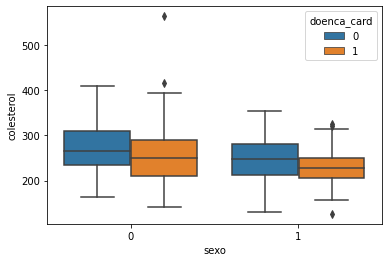

In [28]:
sns.boxplot(data=dados, x='sexo', y='colesterol', hue='doenca_card')

# Exercícios!

1. Crie uma variável para armazenar o seu nome.

2. Crie uma variável para armazer seu sobrenome. 

3. Crie uma variável para armazenar sua idade.

4. Crie uma variável para armazenar sua altura, em metros.

5. Use a função `print()` para **imprimir seu nome e sobrenome** de forma agradável.

João Souza


6. Use a função `print()` para imprimir uma frase (*usando as variaveis que criou acima*) que envolva **seu nome, sobrenome, idade e altura**.

João Souza tem 25 anos de idade e mede 1.9 m


7. Use a função `type()` para avaliar qual é o tipo das variáveis que você criou anteriormente.

int

str

float

str

8. É possível executar a seguinte soma: `nome + altura`?

Tente e #descubra.

Lembre sobre os tipos de variáveis. É possível somar um texto com um número?

9. O que acontece ao executar a soma: `nome + sobrenome`?

'JoãoSouza'

10. Adicione um espaco (`' '`) para corrigir o problema da soma acima.

'João Souza'

11. Crie uma variável para seu peso, altura e calcule seu IMC 

(IMC = peso(kg)/altura(m)²

26.59279778393352

12. Suponha (que como eu), você ganhou alguns quilinhos com a pandemia. Atualize a variável `peso` com o novo valor e imprima o imc novamente. **O valor do imc mudou?**

26.59279778393352

13.  Crie uma lista com o nome de 3 itens de sua escolha. Em seguida, selecione cada um dos nomes usando o método dos colchetes.

'Mycobacterium tuberculosis'

'Candida albicans'

'Leishmania amazonensis'

14. Calcule a média da seguinte lista idades - 44,55,56,76,88,23,24

**Dica**: você pode usar a função `np.mean()` do pacote numpy.



In [51]:
idades = [44,55,56,76,88,23,24]

In [52]:
import numpy as np

15. Imprima uma frase falando das médias de idades encontradas usando a função `round()` para arredondar a média **para 3 casas decimais**.

A média de idades encontrada foi de 52.29 anos


16. Calcule o desvio padrão dos seguintes pesos: 100,150,99,32,44,66,49,76,54 

**Dica**: você pode utilizar a função `np.std()` do numpy

In [56]:
pesos = [100,150,99,32,44,66,49,76,54] 

34.692654077103704